In [1]:
%load_ext autoreload
%autoreload 2

Quantum Coin Flip Circuit:


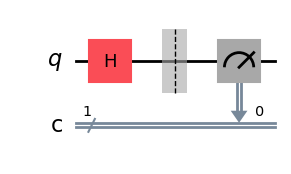


Running quantum simulation jobs...
(1000 jobs with 1024 shots each)


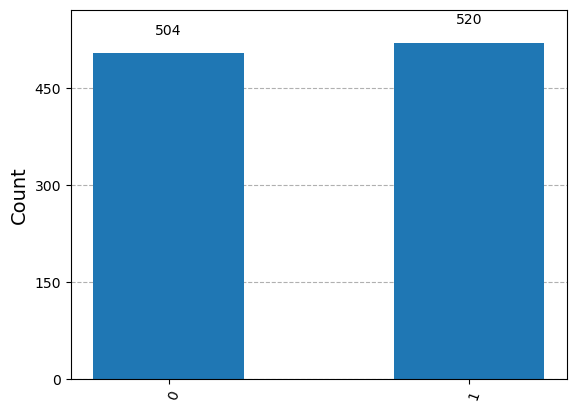


Analysis Results for Tails (1):
mean_success_rate: 50.78%
std_success_rate: 0.00%
min_success_rate: 50.78%
max_success_rate: 50.78%
total_trials: 1
target_value: 1

Average counts per job:
Average number of heads (0): 504.00
Average number of tails (1): 520.00

Plotting success rate distribution for tails...


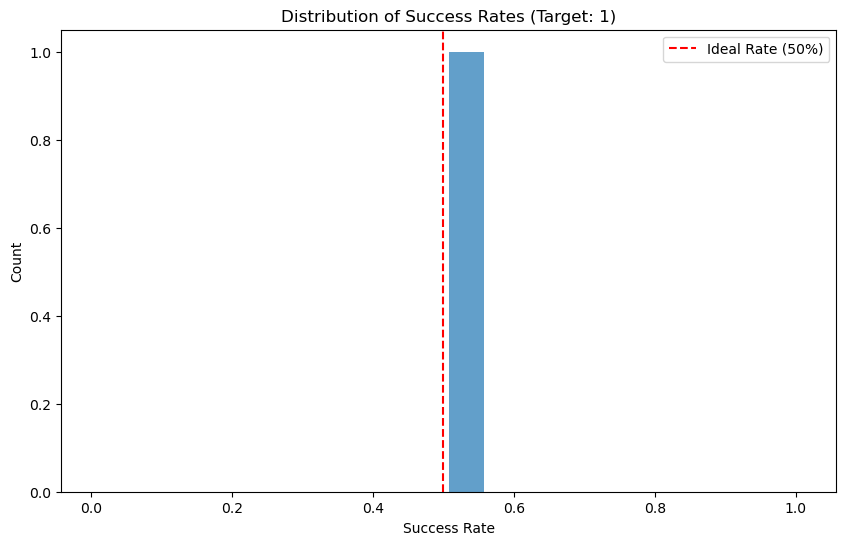


Exporting results...


In [2]:
# Cell 1 - Imports and Setup
import sys
import os
from IPython.display import display

# Get the absolute path to the project root directory
project_root = os.path.dirname(os.getcwd())
sys.path.append(project_root)

from qward.validators.flip_coin_validator import FlipCoinValidator

# Cell 2 - Create and Display Circuit
# Create a flip coin validator
validator = FlipCoinValidator(use_barriers=True)

# Display the circuit
print("Quantum Coin Flip Circuit:")
circuit_fig = validator.draw()
display(circuit_fig)

# Cell 3 - Run Simulation and Analysis
# Run multiple jobs with many shots each to gather statistics
print("\nRunning quantum simulation jobs...")
print("(1000 jobs with 1024 shots each)")
results = validator.run_simulation(
    show_histogram=True,  # Show histogram of first job
    num_jobs=1,       # Number of independent jobs
    shots_per_job=1024   # Number of coin flips per job
)

# Display analysis results for tails (1)
print("\nAnalysis Results for Tails (1):")
analysis = results["analysis"]["success_rate"]
for key, value in analysis.items():
    if key == "average_counts":
        print(f"\nAverage counts per job:")
        print(f"Average number of heads (0): {value['heads']:.2f}")
        print(f"Average number of tails (1): {value['tails']:.2f}")
    else:
        print(f"{key}: {value:.2%}" if isinstance(value, float) else f"{key}: {value}")

# Cell 4 - Plot Results
# Plot success rate distribution for tails
print("\nPlotting success rate distribution for tails...")
validator.success_rate.plot(target_value='1', ideal_rate=0.5)  # For a fair coin, we expect 50% tails

# Cell 5 - Export Results
# Export results to CSV
print("\nExporting results...")
validator.success_rate.export_results("flip_coin_results.csv") 


Running on IBM Quantum Hardware...
(Single job with 1024 shots)
Using backend: ibm_sherbrooke
Pending jobs: 2
>>> Job ID: czdq9n6b7tt0008gqv20
>>> Job Status: QUEUED
>>> Job Status: QUEUED
>>> Job Status: QUEUED
>>> Job Status: QUEUED
>>> Job Status: QUEUED
>>> Job Status: QUEUED
>>> Job Status: QUEUED
>>> Job Status: QUEUED
>>> Job Status: QUEUED
>>> Job Status: QUEUED
>>> Job Status: QUEUED
>>> Job Status: QUEUED
>>> Job Status: RUNNING
>>> Job Status: RUNNING
>>> Job Status: DONE
{'0': 2116, '1': 1980}


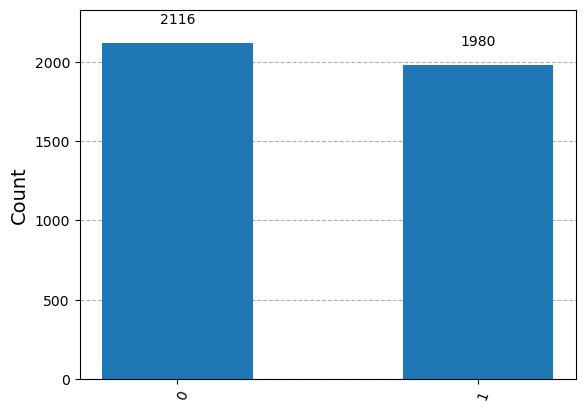


Backend used: ibm_sherbrooke
Job ID: czdq9n6b7tt0008gqv20

Results from IBM Quantum:
Total shots: 4096
Heads (0): 2116 (51.66%)
Tails (1): 1980 (48.34%)

Comparison with simulation averages:
Simulation - Tails rate: 50.78%
IBM Q     - Tails rate: 48.34%


In [3]:
# Cell 6 - Run on IBM Quantum Hardware
print("\nRunning on IBM Quantum Hardware...")
print("(Single job with 1024 shots)")

# Create a new validator for IBM run to keep results separate
ibm_validator = FlipCoinValidator(use_barriers=True)

# Run on IBM with a single job
ibm_results = ibm_validator.run_on_ibm()

if ibm_results["status"] == "completed":
    print(f"\nBackend used: {ibm_results['backend']}")
    print(f"Job ID: {ibm_results['job_id']}")
    
    print("\nResults from IBM Quantum:")
    counts = ibm_results["counts"]
    total_shots = sum(counts.values())
    heads = counts.get('0', 0)
    tails = counts.get('1', 0)
    
    print(f"Total shots: {total_shots}")
    print(f"Heads (0): {heads} ({heads/total_shots:.2%})")
    print(f"Tails (1): {tails} ({tails/total_shots:.2%})")
    
    # Compare with simulation averages
    print("\nComparison with simulation averages:")
    print(f"Simulation - Tails rate: {analysis['average_counts']['tails']/1024:.2%}")
    print(f"IBM Q     - Tails rate: {tails/total_shots:.2%}")
else:
    print(f"\nIBM Quantum execution failed:")
    print(f"Status: {ibm_results['status']}")
    if 'error' in ibm_results:
        print(f"Error: {ibm_results['error']}") 